### The CMD 3.5 website had an error for the CFHT post-2014 photometric system isochrones. 
### They misnamed the r and i bands and we identify the problem in this notebook

In [2]:
import numpy as np
import astropy.units as u
import astropy.constants as c
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
import isochrones as iso
from scipy.signal import find_peaks

In [5]:
#Load in the data and name the columns
two_header, two_data = iso.open_create('1-2_02-02_post.rtf')
two_header_pre, two_data_pre = iso.open_create('1-2_02-02_pre.dat')

two = two_data[1]

post_umag = np.array(two[:-5, 28])
post_gmag = np.array(two[:-5, 29])
post_rmag = np.array(two[:-5, 30])
post_imag = np.array(two[:-5, 31])
post_zmag = np.array(two[:-5, 32])

pre = two_data_pre[1]

pre_umag = np.array(pre[:-5, 28])
pre_gmag = np.array(pre[:-5, 29])
pre_rmag = np.array(pre[:-5, 30])
pre_imag = np.array(pre[:-5, 31])
pre_zmag = np.array(pre[:-5, 32])

#display the age and metallicity to make sure we are comparing the same isochrones
two[1][1], two[1][2], pre[1][1], pre[1][2]

(-2.0, 9.0, -2.0, 9.0)

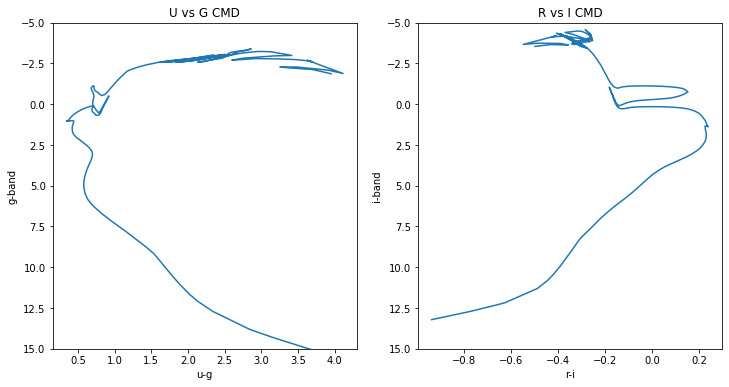

In [6]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121)
ax1.plot((post_umag-post_gmag), post_gmag)
ax1.set_ylim([15, -5])
ax1.set_ylabel('g-band')
ax1.set_xlabel('u-g')

ax2 = fig.add_subplot(122)
ax2.plot((post_rmag-post_imag), post_imag)
ax2.set_ylim([15, -5])
ax2.set_ylabel('i-band')
ax2.set_xlabel('r-i')


ax1.set_title('U vs G CMD')
ax2.set_title('R vs I CMD')
plt.show()

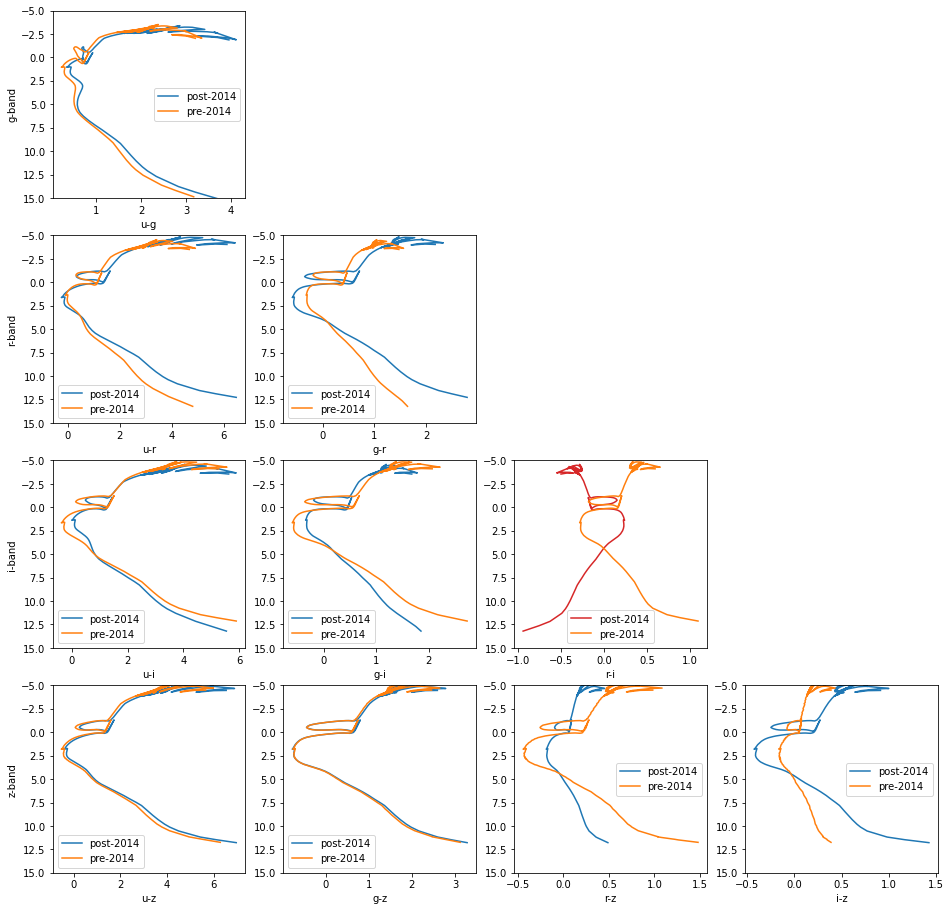

In [7]:
plt.figure(figsize=(20, 20))

ax1 = plt.subplot2grid((5, 5), (1, 1))
ax1.plot((post_umag-post_gmag), post_gmag, label='post-2014')
ax1.plot((pre_umag-pre_gmag), pre_gmag, label='pre-2014')
ax1.set_ylim([15, -5])
ax1.set_ylabel('g-band')
ax1.set_xlabel('u-g')
ax1.legend()


ax2 = plt.subplot2grid((5, 5), (2, 1))
ax2.plot((post_umag-post_rmag), post_rmag, label='post-2014')
ax2.plot((pre_umag-pre_rmag), pre_rmag, label='pre-2014')
ax2.set_ylim([15, -5])
ax2.set_ylabel('r-band')
ax2.set_xlabel('u-r')
ax2.legend()

ax3 = plt.subplot2grid((5, 5), (3, 1))
ax3.plot((post_umag-post_imag), post_imag, label='post-2014')
ax3.plot((pre_umag-pre_imag), pre_imag, label='pre-2014')
ax3.set_ylim([15, -5])
ax3.set_ylabel('i-band')
ax3.set_xlabel('u-i')
ax3.legend()

ax4 = plt.subplot2grid((5, 5), (4, 1))
ax4.plot((post_umag-post_zmag), post_zmag, label='post-2014')
ax4.plot((pre_umag-pre_zmag), pre_zmag, label='pre-2014')
ax4.set_ylim([15, -5])
ax4.set_ylabel('z-band')
ax4.set_xlabel('u-z')
ax4.legend()



ax5 = plt.subplot2grid((5, 5), (2, 2))
ax5.plot((post_gmag-post_rmag), post_rmag, label='post-2014')
ax5.plot((pre_gmag-pre_rmag), pre_rmag, label='pre-2014')
ax5.set_ylim([15, -5])
ax5.set_xlabel('g-r')
ax5.legend()

ax6 = plt.subplot2grid((5, 5), (3, 2))
ax6.plot((post_gmag-post_imag), post_imag, label='post-2014')
ax6.plot((pre_gmag-pre_imag), pre_imag, label='pre-2014')
ax6.set_ylim([15, -5])
ax6.set_xlabel('g-i')
ax6.legend()

ax7 = plt.subplot2grid((5, 5), (4, 2))
ax7.plot((post_gmag-post_zmag), post_zmag, label='post-2014')
ax7.plot((pre_gmag-pre_zmag), pre_zmag, label='pre-2014')
ax7.set_ylim([15, -5])
ax7.set_xlabel('g-z')
ax7.legend()



ax8 = plt.subplot2grid((5, 5), (3, 3), colspan=1)
ax8.plot((post_rmag-post_imag), post_imag, label='post-2014', color='tab:red')
ax8.plot((pre_rmag-pre_imag), pre_imag, label='pre-2014', color='tab:orange')
ax8.set_ylim([15, -5])
ax8.set_xlabel('r-i')
ax8.legend()

ax9 = plt.subplot2grid((5, 5), (4, 3))
ax9.plot((post_rmag-post_zmag), post_zmag, label='post-2014')
ax9.plot((pre_rmag-pre_zmag), pre_zmag, label='pre-2014')
ax9.set_ylim([15, -5])
ax9.set_xlabel('r-z')
ax9.legend()



ax10 = plt.subplot2grid((5, 5), (4, 4))
ax10.plot((post_imag-post_zmag), post_zmag, label='post-2014')
ax10.plot((pre_imag-pre_zmag), pre_zmag, label='pre-2014')
ax10.set_ylim([15, -5])
ax10.set_xlabel('i-z')
ax10.legend()

plt.show()

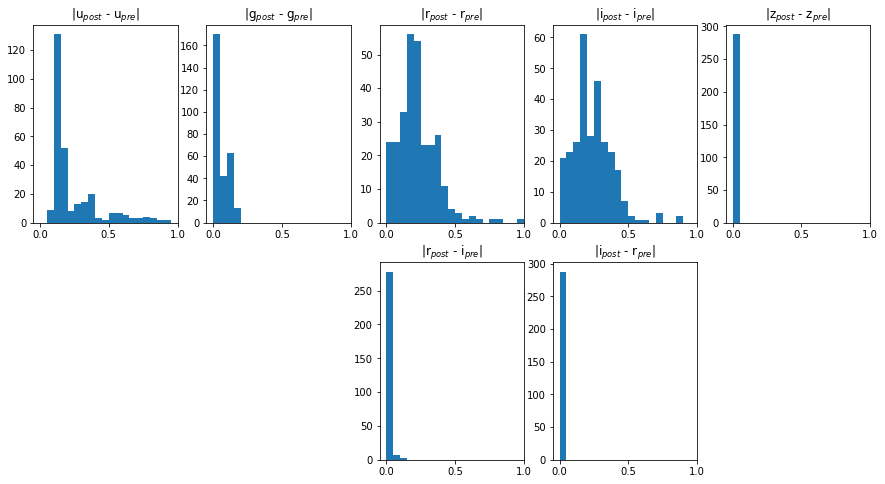

In [8]:
delta_u = np.abs(post_umag-pre_umag)
delta_g = np.abs(post_gmag-pre_gmag)
delta_r = np.abs(post_rmag-pre_rmag)
delta_i = np.abs(post_imag-pre_imag)
delta_z = np.abs(post_zmag-pre_zmag)

cross_r = np.abs(post_rmag-pre_imag)
cross_i = np.abs(post_imag-pre_rmag)

fig1 = plt.figure(figsize=(15, 8))

axa = fig1.add_subplot(251)
axa.hist(delta_u, bins=np.arange(0, 1.05, 0.05))
axa.set_title('|u$_{post}$ - u$_{pre}$|')
axa.set_xlim([-0.05, 1])

axb = fig1.add_subplot(252)
axb.hist(delta_g, bins=np.arange(0, 1.05, 0.05))
axb.set_title('|g$_{post}$ - g$_{pre}$|')
axb.set_xlim([-0.05, 1])

axc = fig1.add_subplot(253)
axc.hist(delta_r, bins=np.arange(0, 1.05, 0.05))
axc.set_title('|r$_{post}$ - r$_{pre}$|')
axc.set_xlim([-0.05, 1])

axd = fig1.add_subplot(254)
axd.hist(delta_i, bins=np.arange(0, 1.05, 0.05))
axd.set_title('|i$_{post}$ - i$_{pre}$|')
axd.set_xlim([-0.05, 1])

axe = fig1.add_subplot(255)
axe.hist(delta_z, bins=np.arange(0, 1.05, 0.05))
axe.set_title('|z$_{post}$ - z$_{pre}$|')
axe.set_xlim([-0.05, 1])

#plt.show()

#fig2 = plt.figure(figsize=(15, 3))

axf = fig1.add_subplot(258)
axf.hist(cross_r, bins=np.arange(0, 1.05, 0.05))
axf.set_title('|r$_{post}$ - i$_{pre}$|')
axf.set_xlim([-0.05, 1])

axg = fig1.add_subplot(259)
axg.hist(cross_i, bins=np.arange(0, 1.05, 0.05))
axg.set_title('|i$_{post}$ - r$_{pre}$|')
axg.set_xlim([-0.05, 1])

plt.show()

### From now until CMD 3.6 comes out in a couple weeks (early October currently), rename i and r bands for eachother